<a href="https://colab.research.google.com/github/farahshahhoud/Machine_Learning/blob/master/Labratory4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Цель лабораторной работы
Изучение сложных способов подготовки выборки и подбора гиперпараметров на примере метода ближайших соседей.

In [1]:
import  numpy  as  np 
import  pandas  as  pd 
from  typing  import  Dict ,  Tuple 
from  scipy  import  stats 
from  sklearn.datasets  import  * 
from  sklearn.model_selection  import  train_test_split 
from  sklearn.neighbors  import  KNeighborsRegressor ,  KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from  sklearn.metrics  import  accuracy_score ,  balanced_accuracy_score 
from sklearn.metrics  import  plot_confusion_matrix 
from  sklearn.metrics  import  precision_score ,  recall_score ,  f1_score ,  classification_report 
from  sklearn.metrics  import  confusion_matrix 
from  sklearn.metrics  import  mean_absolute_error ,  mean_squared_error ,  mean_squared_log_error ,  median_absolute_error ,  r2_score  
from  sklearn.metrics  import  roc_curve ,  roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import  seaborn  as  sns
import  matplotlib.pyplot  as  plt 
% matplotlib inline 
sns . set ( style = "ticks" )

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Набор данных
Наш набор данных взят с сайта Kaggle. Он описывает спецификацию подержанного автомобиля. Наша цель - предсказать цену автомобиля. Поэтому наша задача - построить модель машинного обучения в качестве регрессора для цены автомобилей.

In [2]:
data = pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data.shape

(301, 9)

In [4]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

#Подготовка данных и построение базовых моделей для оценки качества

##Обработка пропусков в числовых данных

Проверка, содержит ли наш набор данных недостающие данные.

In [5]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Наш набор данных не содержит недостающих данных.   
Мы проверим, есть ли переменные объекта, чтобы преобразовать их в числовые значения.

In [6]:
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

##Кодирование категориальных признаков

У нас будет простой кодировщик для кодирования значений типа объекта.

In [8]:
np.unique(data.Fuel_Type)

array(['CNG', 'Diesel', 'Petrol'], dtype=object)

In [0]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [0]:
data_Fuel=LE.fit_transform(data['Fuel_Type'])
data['Fuel_Type']=data_Fuel

In [11]:
np.unique(data.Seller_Type)

array(['Dealer', 'Individual'], dtype=object)

In [0]:
data_Seller=LE.fit_transform(data.Seller_Type)
data.Seller_Type=data_Seller

In [13]:
np.unique(data.Transmission)

array(['Automatic', 'Manual'], dtype=object)

In [0]:
data_Tran=LE.fit_transform(data.Transmission)
data.Transmission=data_Tran

In [15]:
np.unique(data.Car_Name)

array(['800', 'Activa 3g', 'Activa 4g', 'Bajaj  ct 100',
       'Bajaj Avenger 150', 'Bajaj Avenger 150 street',
       'Bajaj Avenger 220', 'Bajaj Avenger 220 dtsi',
       'Bajaj Avenger Street 220', 'Bajaj Discover 100',
       'Bajaj Discover 125', 'Bajaj Dominar 400', 'Bajaj Pulsar  NS 200',
       'Bajaj Pulsar 135 LS', 'Bajaj Pulsar 150', 'Bajaj Pulsar 220 F',
       'Bajaj Pulsar NS 200', 'Bajaj Pulsar RS200', 'Hero  CBZ Xtreme',
       'Hero  Ignitor Disc', 'Hero Extreme', 'Hero Glamour',
       'Hero Honda CBZ extreme', 'Hero Honda Passion Pro', 'Hero Hunk',
       'Hero Passion Pro', 'Hero Passion X pro', 'Hero Splender Plus',
       'Hero Splender iSmart', 'Hero Super Splendor', 'Honda Activa 125',
       'Honda Activa 4G', 'Honda CB Hornet 160R', 'Honda CB Shine',
       'Honda CB Trigger', 'Honda CB Unicorn', 'Honda CB twister',
       'Honda CBR 150', 'Honda Dream Yuga ', 'Honda Karizma',
       'Hyosung GT250R', 'KTM 390 Duke ', 'KTM RC200', 'KTM RC390',
       'Mahindr

In [16]:
date_test=data.groupby("Car_Name")
date_test.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
273,jazz,2010,2.25,7.50,61203,2,0,1,0
274,brio,2014,5.30,6.80,16500,2,0,1,0
278,jazz,2016,6.00,8.40,4000,2,0,1,0
285,jazz,2016,7.40,8.50,15059,2,0,0,0


In [17]:
data.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Yamaha FZ 16                 1
Bajaj Discover 100           1
Honda CB Unicorn             1
Royal Enfield Bullet 350     1
omni                         1
Name: Car_Name, Length: 98, dtype: int64

Поскольку названия автомобилей не являются уникальными, мы можем использовать информацию из похожих имен автомобилей. Итак, мы собираемся закодировать все названия автомобилей.

In [0]:
data_Name=LE.fit_transform(data.Car_Name)
data.Car_Name=data_Name

In [19]:
data.dtypes

Car_Name           int64
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type          int64
Seller_Type        int64
Transmission       int64
Owner              int64
dtype: object

In [20]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


##Разделение выборки на обучающую и тестовую

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    data[['Car_Name','Year','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']], data['Seller_Type'], test_size=0.3, random_state=1)

In [22]:
X_train.shape, y_train.shape

((210, 8), (210,))

In [23]:
X_test.shape, y_test.shape

((91, 8), (91,))

In [24]:
data.describe()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,62.571429,2013.627907,4.661296,7.628472,36947.205980,1.787375,0.352159,0.867110,0.043189
std,25.573535,2.891554,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915
min,0.000000,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,2012.000000,0.900000,1.200000,15000.000000,2.000000,0.000000,1.000000,0.000000
50%,69.000000,2014.000000,3.600000,6.400000,32000.000000,2.000000,0.000000,1.000000,0.000000
75%,82.000000,2016.000000,6.000000,9.900000,48767.000000,2.000000,1.000000,1.000000,0.000000
max,97.000000,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


#Построим базовые модели на основе метода ближайших соседей

Мы выберем два значения для числа соседей и посмотрим их производительность, используя некоторые метрики.

In [25]:
reg1_1 = KNeighborsRegressor(n_neighbors=2)
reg1_1.fit(X_train, y_train)
target2_1 = reg1_1.predict(X_test)
len(target2_1), target2_1

(91, array([0. , 0. , 0.5, 0. , 0.5, 0. , 0.5, 0. , 0. , 0.5, 0.5, 0. , 1. ,
        0. , 0. , 1. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0.5, 0.5, 0. ,
        0. , 0.5, 0.5, 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0.5, 0.5, 1. ,
        0.5, 0. , 0. , 1. , 0.5, 0. , 0.5, 0. , 0. , 0.5, 0. , 0. , 0.5,
        1. , 0.5, 1. , 0. , 0. , 0.5, 0. , 0. , 0. , 0.5, 0.5, 0. , 0.5,
        1. , 0. , 1. , 0. , 0.5, 0. , 0. , 0. , 1. , 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0. , 0.5, 1. , 0. , 0.5, 1. , 0.5, 0.5, 1. ]))

In [26]:
# 10 ближайших соседей
reg1_2 = KNeighborsRegressor(n_neighbors=10)
reg1_2.fit(X_train, y_train)
target2_2 = reg1_2.predict(X_test)
len(target2_2), target2_2

(91, array([0.4, 0.3, 0.6, 0.5, 0.5, 0.5, 0.5, 0.1, 0.4, 0.4, 0.4, 0.1, 0.6,
        0.2, 0.2, 0.6, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.1, 0.5, 0.4, 0.3,
        0.2, 0.6, 0.2, 0.3, 0.3, 0.2, 0.3, 0. , 0.1, 0.1, 0.3, 0.7, 0.4,
        0.3, 0.2, 0.3, 0.6, 0.1, 0.1, 0.2, 0.2, 0.2, 0.1, 0.3, 0.3, 0.5,
        0.4, 0.2, 0.5, 0.1, 0.1, 0.4, 0.2, 0.4, 0.3, 0.7, 0.4, 0.1, 0.5,
        0.5, 0.1, 0.5, 0.1, 0.3, 0.4, 0.1, 0.1, 0.5, 0.6, 0.2, 0.5, 0.5,
        0.8, 0.4, 0.5, 0.6, 0.2, 0.6, 0.5, 0.2, 0.5, 0.5, 0.6, 0.5, 0.5]))

#Метрики качества классификации

##Mean Absolute Error

In [27]:
mean_absolute_error(y_test, target2_1)

0.2967032967032967

In [28]:
mean_absolute_error(y_test, target2_2)

0.38241758241758245

##Mean Square Error

In [29]:
mean_squared_error(y_test, target2_1)

0.1978021978021978

In [30]:
mean_squared_error(y_test, target2_2)

0.19076923076923077

##Median Absolute Error

In [31]:
median_absolute_error(y_test, target2_1)

0.0

In [32]:
median_absolute_error(y_test, target2_2)

0.4

##R2 Score

In [33]:
r2_score(y_test, target2_1)

0.15479876160990724

In [34]:
r2_score(y_test, target2_2)

0.1848503611971105

#Стратегии кросс-валидации

In [0]:
scoring = {'NMSE': 'neg_mean_squared_error', 
           'NMAE': 'neg_mean_absolute_error',
           'NMedAR': 'neg_median_absolute_error',
           'r2': 'r2'}

## 1) K-fold

In [59]:
kf = KFold(n_splits=5)
scores = cross_validate(KNeighborsRegressor(n_neighbors=2),
                        data[['Car_Name','Year','Present_Price','Kms_Driven',
                              'Fuel_Type','Seller_Type','Transmission','Owner']]
                        , data['Seller_Type'], scoring=scoring, 
                        cv=kf, return_train_score=True)
scores

{'fit_time': array([0.00299525, 0.00273657, 0.00267625, 0.00188065, 0.00184083]),
 'score_time': array([0.00376844, 0.0022037 , 0.0020256 , 0.0019753 , 0.00198936]),
 'test_NMAE': array([-0.32786885, -0.26666667, -0.63333333, -0.36666667, -0.4       ]),
 'test_NMSE': array([-0.22131148, -0.16666667, -0.5       , -0.28333333, -0.34166667]),
 'test_NMedAR': array([-0.5, -0. , -0.5, -0.5, -0.5]),
 'test_r2': array([-2.61184211,  0.28229665,  0.        , -0.275     ,  0.        ]),
 'train_NMAE': array([-0.14166667, -0.14937759, -0.11410788, -0.13485477, -0.12863071]),
 'train_NMSE': array([-0.07083333, -0.0746888 , -0.05705394, -0.06742739, -0.06431535]),
 'train_NMedAR': array([-0., -0., -0., -0., -0.]),
 'train_r2': array([0.71014493, 0.6710646 , 0.63057414, 0.7062078 , 0.73895877])}

## 2) Repeated K-Fold

In [61]:
kf = RepeatedKFold(n_splits=5, n_repeats=2)
scores = cross_validate(KNeighborsRegressor(n_neighbors=2),
                        data[['Car_Name','Year','Present_Price','Kms_Driven',
                              'Fuel_Type','Seller_Type','Transmission','Owner']]
                        , data['Seller_Type'], scoring=scoring,
                        cv=kf, return_train_score=False)
scores, np.mean(scores['test_NMAE'])

({'fit_time': array([0.00447702, 0.00267315, 0.00206423, 0.00201416, 0.00202298,
         0.00204992, 0.00208592, 0.00204706, 0.00212574, 0.00203228]),
  'score_time': array([0.00317717, 0.00344634, 0.0024271 , 0.00237226, 0.00225186,
         0.00220561, 0.00222707, 0.00226998, 0.0022068 , 0.00227284]),
  'test_NMAE': array([-0.22131148, -0.29166667, -0.425     , -0.31666667, -0.31666667,
         -0.32786885, -0.31666667, -0.275     , -0.30833333, -0.29166667]),
  'test_NMSE': array([-0.15163934, -0.20416667, -0.32083333, -0.23333333, -0.26666667,
         -0.26229508, -0.23333333, -0.1875    , -0.2125    , -0.17916667]),
  'test_NMedAR': array([-0.  , -0.  , -0.5 , -0.  , -0.  , -0.  , -0.  , -0.  , -0.25,
         -0.5 ]),
  'test_r2': array([ 0.2929198 ,  0.08125   , -0.41025641,  0.05723906, -0.23234917,
         -0.07252747, -0.05      ,  0.22857143,  0.01797176,  0.08380682])},
 -0.30908469945355194)

## 3) ShuffleSplit

In [62]:
kf = ShuffleSplit(n_splits=5, test_size=0.25)
scores = cross_validate(KNeighborsRegressor(n_neighbors=2),
                        data[['Car_Name','Year','Present_Price','Kms_Driven',
                              'Fuel_Type','Seller_Type','Transmission','Owner']]
                        , data['Seller_Type'], scoring=scoring,
                        cv=kf, return_train_score=False)
scores

{'fit_time': array([0.00326657, 0.00246572, 0.00267696, 0.00183225, 0.00178576]),
 'score_time': array([0.00692558, 0.00252438, 0.00231409, 0.00207949, 0.00201607]),
 'test_NMAE': array([-0.29605263, -0.31578947, -0.33552632, -0.33552632, -0.33552632]),
 'test_NMSE': array([-0.21381579, -0.21052632, -0.25986842, -0.27960526, -0.25328947]),
 'test_NMedAR': array([-0.  , -0.5 , -0.  , -0.  , -0.25]),
 'test_r2': array([ 0.10507246,  0.00246103, -0.06605114, -0.54693487, -0.14745098])}

#Оптимизация гиперпараметров

##Grid Search

In [39]:
n_range = np.array(range(1,150,4))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([  1,   5,   9,  13,  17,  21,  25,  29,  33,  37,  41,  45,  49,
          53,  57,  61,  65,  69,  73,  77,  81,  85,  89,  93,  97, 101,
         105, 109, 113, 117, 121, 125, 129, 133, 137, 141, 145, 149])}]

In [40]:
regr_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
regr_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([  1,   5,   9,  13,  17,  21,  25,  29,  33,  37,  41,  45,  49,
        53,  57,  61,  65,  69,  73,  77,  81,  85,  89,  93,  97, 101,
       105, 109, 113, 117, 121, 125, 129, 133, 137, 141, 145, 149])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [41]:
regr_gs.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=41, p=2,
                    weights='uniform')

In [43]:
regr_gs.best_params_

{'n_neighbors': 41}

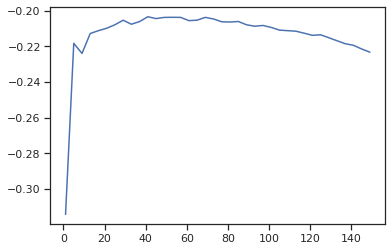

In [44]:
plt.plot(n_range, regr_gs.cv_results_['mean_test_score'])

#Обучение модели ближайших соседей для оптимального значения

In [53]:
regr_gs.best_estimator_.fit(X_train, y_train)
Y_pred = regr_gs.best_estimator_.predict(X_test)
    
mae = mean_absolute_error(y_test, Y_pred)
mse = mean_squared_error(y_test, Y_pred)
r2 = r2_score(y_test, Y_pred)

print(regr_models_grid)
print('MAE={}, MSE={}, R2={}'.format(
    round(mae, 3), round(mse, 3), round(r2, 3)))

{'KNN_41': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=41, p=2,
                    weights='uniform')}
MAE=0.388, MSE=0.191, R2=0.183


#Построение кривых обучения и валидации
##Построение кривых обучения - learning_curve

In [0]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("neg_mean_squared_error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.multiply(np.mean(test_scores, axis=1),-1)
    test_scores_std = np.std(test_scores, axis=1)


    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

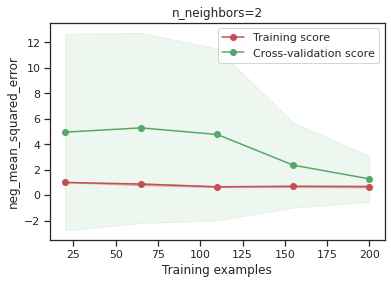

In [105]:
plot_learning_curve(KNeighborsRegressor(n_neighbors=2), 'n_neighbors=2', 
                    data[['Car_Name','Year','Present_Price','Kms_Driven',
                              'Fuel_Type','Seller_Type','Transmission','Owner']]
                        , data['Seller_Type'], cv=3)

Перекрестная проверка означает, что оценка снижается, поскольку при регрессии оптимизируется значение ошибки, а не точность.

##Построение кривой валидации - validation_curve

In [0]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.multiply(np.mean(train_scores, axis=1),-1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.multiply(np.mean(test_scores, axis=1),-1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

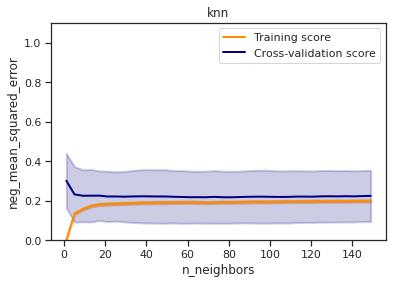

In [93]:
plot_validation_curve(regr_gs.best_estimator_, 'knn', 
                    data[['Car_Name','Year','Present_Price','Kms_Driven',
                              'Fuel_Type','Seller_Type','Transmission','Owner']]
                        , data['Seller_Type'], param_name='n_neighbors',
                       param_range=n_range,cv=20,scoring='neg_mean_squared_error')